In [1]:
import pandas as pd

from extract_transform import get_sorted_ngram_counts
from visualize import plot_wordcloud, plot_ngram_counts

In [2]:
osm_data = pd.read_json('data/preprocessed-osm-data.json.gz')
wikidata = pd.read_json('data/preprocessed-wikidata.json')

In [3]:
is_starbucks = (wikidata['qid'] == 'Q37158')
is_tim_hortons = (wikidata['qid'] == 'Q175106')
display(wikidata[is_starbucks | is_tim_hortons])

,qid,preprocessed_names,preprocessed_description
0,Q37158,starbucks starbucks corporation starbucks coff...,american multinational coffee company
5,Q175106,tim hortons tim hortons inc,multinational quick service restaurant chain


First, we start off by defining restaurants as establishments which serve food or beverages. Based on our definition we consider Starbucks and Tim Hortons as restaurants.

The Wikidata for Starbucks and Tim Hortons demonstrate that the names and descriptions for chain restaurants may not share many common words and that it may be difficult to identify chain restaurants using solely their names or descriptions. This is supported by how 
1. Starbucks' description does not contain the words 'chain' or 'restaurant' while its name data  contains 'corporation' and 
2. Tim Hortons' name data contains 'inc' and its description contains 'restaurant chain'. 

This is significant as we can use visual aids like wordclouds and word count plots to evaluate whether we can we use Wikidata names and descriptions to identify chain restaurants.

In [4]:
names = wikidata['preprocessed_names']
descriptions = wikidata['preprocessed_description']

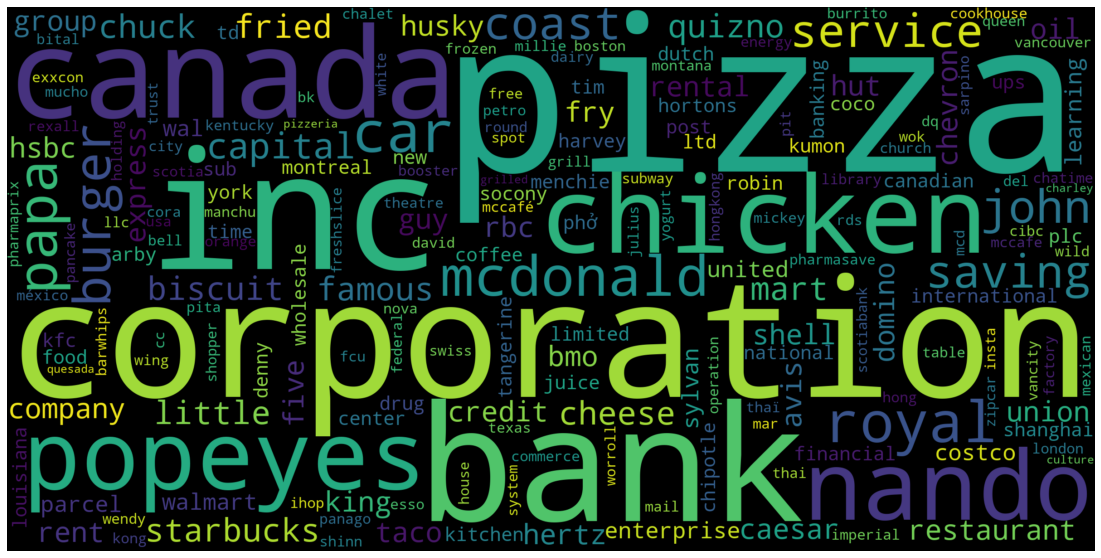

In [5]:
name_text = ' '.join(names)
plot_wordcloud(name_text)

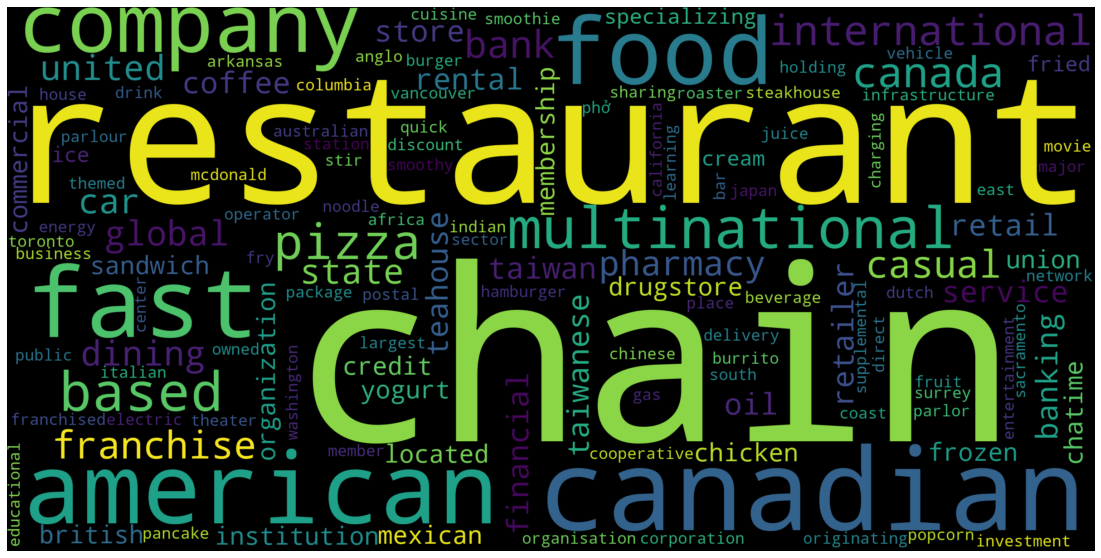

In [6]:
description_text = ' '.join(descriptions)
plot_wordcloud(description_text)

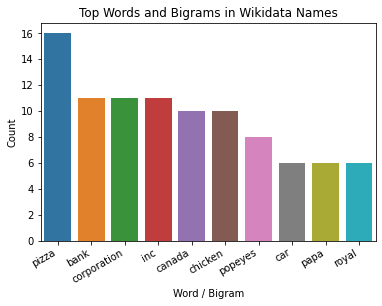

In [7]:
name_gram_counts = get_sorted_ngram_counts(names, ngram_range=(1, 2))
plot_ngram_counts(
    name_gram_counts, 
    title='Top Words and Bigrams in Wikidata Names', 
    xlabel='Word / Bigram'
)

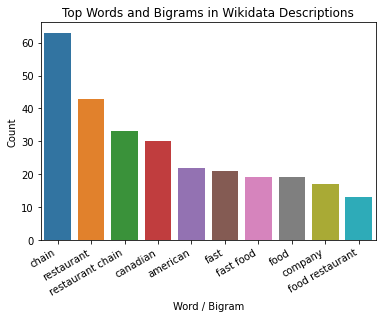

In [8]:
description_gram_counts = get_sorted_ngram_counts(descriptions, ngram_range=(1, 2))
plot_ngram_counts(
    description_gram_counts, 
    title='Top Words and Bigrams in Wikidata Descriptions', 
    xlabel='Word / Bigram'
)